<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2: Greedy</h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un minimum spanning tree de ese grafo es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso proporcional entre ellos, que es un número representativo de algún objeto, distancia, etc.; y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o un árbol expandido mínimo es un árbol recubridor que pesa menos o igual que otros árboles recubridores. Todo grafo tiene un bosque recubridor mínimo.
  </p>
  <p>
      En esta práctica se plantea la implementación del algoritmo de Prim para encontrar el arbol de expansión mínima en el metro de Londres.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: El grafo del metro de londres.</li>
</ul>
<br>
<h3>OUTPUT</h3>

<ul>
<li>
__tree__: Objeto de tipo `Graph` que contenga el MST del grafo inical.
</li>
<ul>

</p>
</div>


In [3]:
# TODO: Importar grafo de la Práctica0.2
from graph import Graph
from util import get_subway_graph, draw_subway_graph
# from test import test

G, lines = get_subway_graph('csv', Graph)
G.edge[1][52]

{'color': '0d6928',
 'distance': 0.014782760229403606,
 'line': 4,
 'name': 'District Line',
 'stripe': 'NULL'}

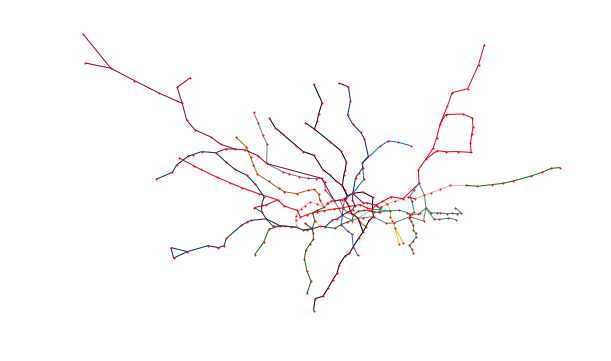

In [4]:
draw_subway_graph(G, lines, figsize=(10,6))

In [20]:
import random
from heapq import heappush, heappop
def prim(G, origin=None, infinity=99999999999):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
     #Diccionari on guardo tots els nodes del graf (O(1))
    _dist = {}
    #Diccionari on guardo el node amb el seu anterior, per a saber el node previ. (O(1))
    _previous = {}
    _cua = []
    _visitats =[]
    tree = Graph()
    
    for node in G.nodes():
        _dist[node] = infinity
        _previous[node]  = None
        
    origin = random.choice(G.nodes())
    _dist[origin] = 0
    heappush(_cua,origin)
    while _cua:
        _cua.sort()
        minim = heappop(_cua)      
        tree.add_edge(G,minim,_previous[minim])
        for i in G.neighbors(minim):
            if (((i in G.nodes()) and (_dist[i]>G.edge[minim][i]['distance'])) or (_dist[i] == infinity)):
                heappush(_cua,i)
                _previous[i]=minim
                _dist[i] = G.edge[minim][i]['distance']
                
                
    
    return tree

In [ ]:
import random
from heapq import heappush, heappop
def prim(G, origin=None):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
     #Diccionari on guardo tots els nodes del graf (O(1))
    _dist = {}
    #Diccionari on guardo el node amb el seu anterior, per a saber el node previ. (O(1))
    _previous = {}
    _cua = []
    _visitats =[]
    tree = Graph()
    
    for node in G.nodes():
        _previous[node]  = None
        
    origin = random.choice(G.nodes())
    _dist[origin] = 0
    heappush(_cua,origin)
    _visitats.append(origin)
    while _cua:
        _cua.sort()
        minim = heappop(_cua)
        _visitats.append(minim)
        
        for i in G.neighbors(minim):
            if i not in list(_dist.keys):
                _dist[i]=G.edge[minim][i]['distance']
                
                if (((i in G.nodes()) and (_dist[i]>G.edge[minim][i]['distance'])) or (i in _visitats)):
                    heappush(_cua,i)
                    _previous[i]=minim
                    _dist[i] = G.edge[minim][i]['distance']
                
                
    
    return tree

In [21]:
prim(G)

In [8]:
import random
def prim(G, origin=None, infinity=99999999999):
    _dist = {}
    _previous={}
    _visitats=[]
    _cua= []
    
    for node in G.nodes():
        _dist[node] = infinity
        _previous[node]  = None
        
    origin = random.choice(G.nodes())
    _dist[origin] = 0
    _cua.append(origin)
    while len(visitats) != len(G.nodes()):
        minim = min(_cua)
        

In [15]:
help(G)

Help on Graph in module graph object:

class Graph(builtins.object)
 |  Clase Graph, que representa un grafo (conjunto de vértices y aristas). La clase representa un grafo no dirigido, por lo tanto, 
 |  las aristas que unen dos vértices son bidireccionales.
 |  Métodos:
 |      -def __init__(self): Constructor de la clase, donde se crea el conjunto vacío de nodos y aristas.
 |      -def node(self)(@property): Atributo que es un conjunto de nodos en un diccionario, donde la key es el nodo y el value son
 |       los atributos del nodo.
 |      -def edge(self)(@property): Atributo que es un conjunto de aristas en un diccionario, donde la key es un nodo y los value
 |       son diccionarios, donde la key es el nodo al que va la arista y el value los atributos de dicha arista.
 |      -def nodes(self): Devuelve una lista con todos los nodos.
 |      -def edges(self): Devuelve una lista con tuplas que representan las aristas (nodo1,nodo2)
 |      -def add_node(self, node, attr_dict=None): 

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


In [51]:
def dijkstra(G, origen, destino, infinity=99999999999):
   
    cua = {} #Diccionari que relaciona cada node amb la distancia mes petita al origen d'aquest
    
    prev = {} #Diccionari que relaciona cada node amb el node per el qual hem arribat
              #a trobar la distancia minima(ho utilitzarem per el path)
        
    cami =[] #Llista on es guardara el cami recorregut desde el origen al desti
    
    visitats = 0   
    
    #Per començar, la distancia de tots els nodes al origen sera infinit menys l'origen que sera 1
    for x in G.nodes():
        cua[x] = infinity
    cua[origen] = 0
    
    #Bucle, mentres la cua no estigui buida
    while cua:
        #Busquem la posicio en cua on es troba el node amb la distancia mes curta a origen.
        minim = list(cua.values()).index(min(cua.values()))
        
        # v sera el node de la posicio trobada anteriorment
        v =(list(cua.keys())[minim])
        return v
        if v == destino:
            break
        visitats = visitats + 1 #Sumem 1 al expanded
        
        #Per tots els veins d'aquest node v, si esta a la cua i no l'hem vist abans(distancia = infinit)
        #o la distancia per aquest nou cami es millor, actualitzem la distancia i el previous i sumem un als visitats
        for x in G.neighbors(v):
            if x in cua and (cua[x] == infinity or cua[v]+G.edge[v][x]['distance'] < cua[x]):
                cua[x] = cua[v]+G.edge[v][x]['distance']
                prev[x] = v
                    
                if x == destino: #Si el node amb el que estem treballan es el desti 
                    distancia_destino = cua[x] #guardem la millor distancia trobada fins el moment   
        
                        
        del cua[v] #Eliminem de la cua el element amb la distancia mes curta perque ja sabem que no trobarem cap opcio millor
        
      
    
    #Per el cami de origen a desti utilitzarem el diccionari prev
    #Primer de tot afegim al cami el desti i guardem a una variable "anterior" el node anterior al desti i tambe l'afegim
    cami.append(destino)
    anterior = prev[destino]
    cami.append(anterior)
    
    #Un cop tenim els dos ultims a la llista entrem a un bucle fins que el anterior sigui el origen
    while anterior != origen:
        anterior = prev[anterior]
        cami.append(anterior)
        #No cal afegir el origen al final de la llista cami perque quan el bucle estigui en la seva ultima etapa 
        #"anterior" es convertira en origen i s'afagira al cami
        
    cami.reverse()#La llista estara al reves ja que hem començat pel desti, la invertim    
        


In [52]:
dijkstra(G, 10, 235)

10

<div class="alert alert-info">
<center>
  <h1>Comentarios</h1>
  <p>
  En esta sección tenéis que comentar brevemente (1) __cómo habéis realizado la implementación del algoritmo__ así como un (2) __análisis detallado de la complejidad__ del mismo.
  </p>
</center>
</div>

_Escribe tu respuesta en este bloque_

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
  <p>
  La entrega de esta práctica se realizará a través del __Campus Virtual__. En ella tenéis que incluir únicamente el fichero `.ipynb` sin comprimir con el código debidamente comentado y los comentarios que se os proponen en la anterior sección.
  </p>
  <p>
  El nombre del archivo ha de seguir el formato:
  </p><p style="text-align:center">
  ```
  <apellidos>_<nombre>_EP1.ipynb
  ```
  </p>
</center>
</div>